<a href="https://colab.research.google.com/github/spanish-inquisition-optimization/GradientDescent/blob/master/Lection%20examples/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [43]:
# %run gradient_descent.ipynb import gradient_descent
from core.gradient_descent import *

[[-20.          20.        ]
 [  5.21598581  17.37753748]
 [  4.18043169   7.42641923]
 [  5.00709278   7.34039732]
 [  4.97308933   7.01401798]
 [  5.00023329   7.01119008]
 [  4.99911491   7.00046129]
 [  5.00000769   7.00036823]
 [  4.99997084   7.00001521]
 [  5.00000025   7.00001215]
 [  4.99999904   7.0000005 ]
 [  5.00000001   7.0000004 ]
 [  4.99999997   7.00000002]
 [  5.           7.00000001]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]
 [  5.           7.        ]]


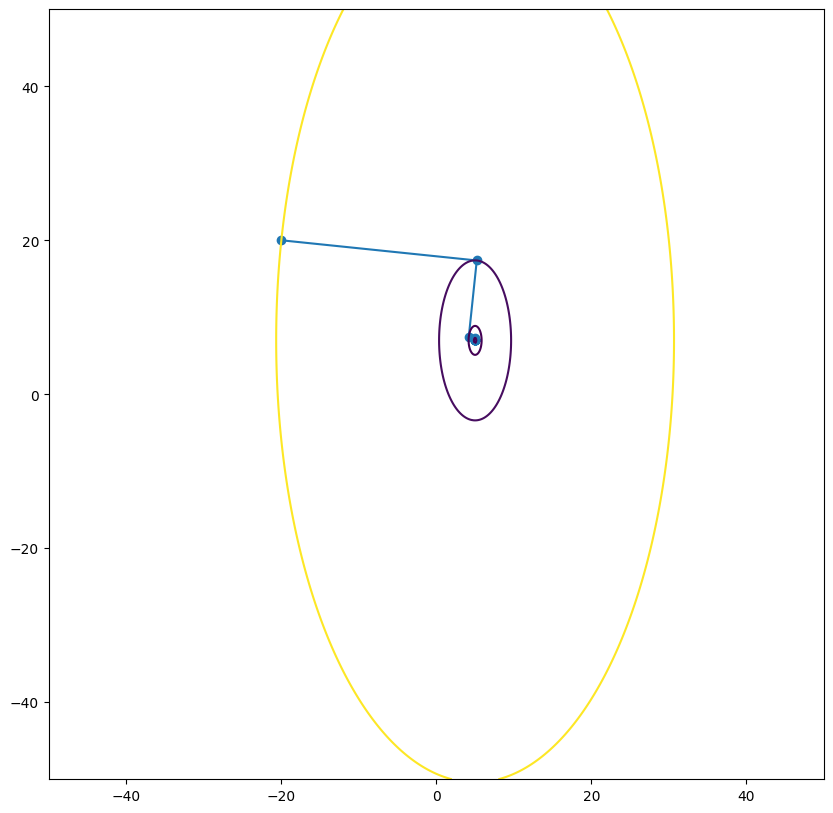

In [42]:
plt.rcParams["figure.figsize"] = (10,10)
t = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(t, t)

alpha = 5
def f(x):
    return alpha * (x[0] - 5) ** 2 + (x[1] - 7) ** 2

def grad(x):
    return [2 * alpha * (x[0]  - 5), 2 * (x[1] - 7)]

points = np.array(gradient_descent(f, grad, [-20, 20], fibonacci_search(30), lambda f, points: len(points) > 20))
print(points)

plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted(set([f(p) for p in points])))

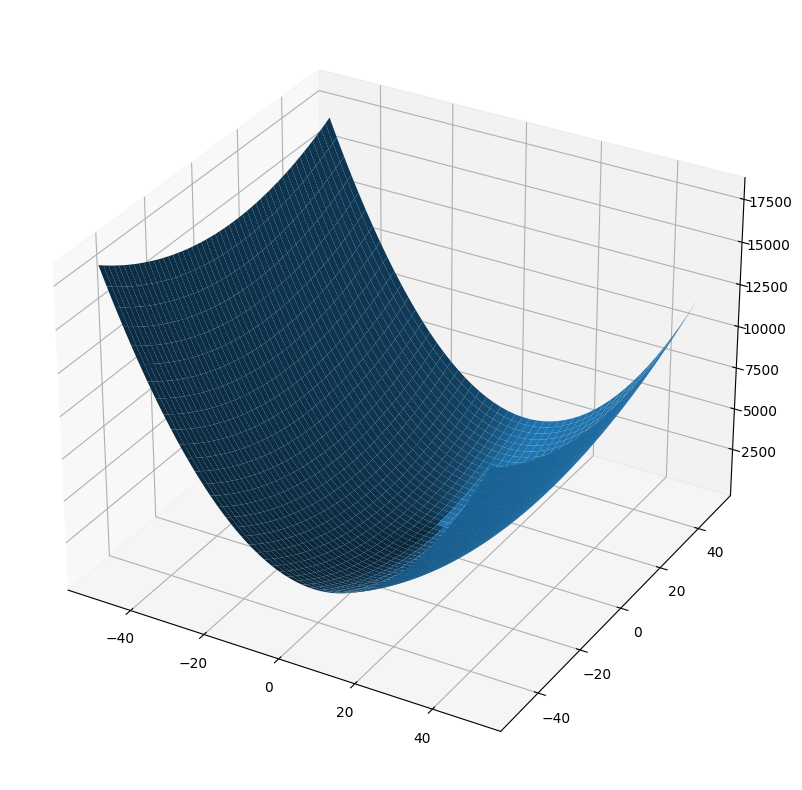

In [25]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f([X, Y]))


# Gradient descent $f(x, y) = \sin(0.5 x^2 - 0.25 y^2 + 3)cos(2x+1-\exp(y))$

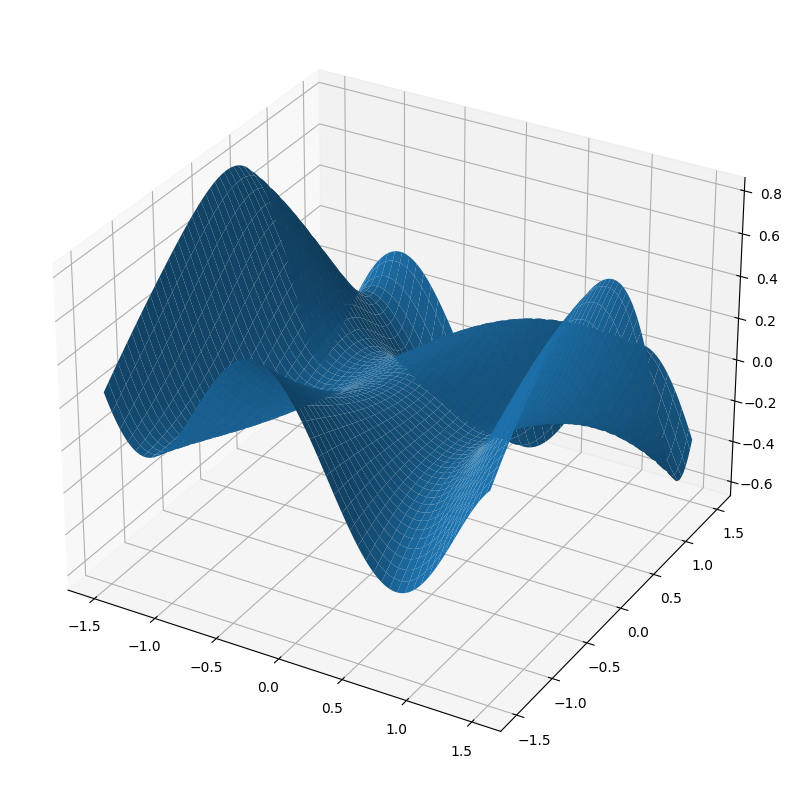

In [46]:
def trig_f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

def trig_grad(x):
    h = 1e-5
    return (trig_f(x[:, np.newaxis] + h * np.eye(2)) - trig_f(x[:, np.newaxis] - h * np.eye(2)))/(2 * h)

t = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, trig_f(np.stack((X, Y))))

[[-0.1        -0.4       ]
 [-0.10521824 -0.38199919]
 [-0.11185515 -0.36454272]
 [-0.12010457 -0.34758569]
 [-0.13018685 -0.33108343]
 [-0.14234858 -0.3149924 ]
 [-0.15685956 -0.29927173]
 [-0.1740055  -0.28388572]
 [-0.19407368 -0.2688077 ]
 [-0.21732877 -0.25402572]
 [-0.243975   -0.23955054]
 [-0.27410232 -0.22542585]
 [-0.30761707 -0.21174018]
 [-0.34416528 -0.1986377 ]
 [-0.38306793 -0.1863236 ]
 [-0.42330022 -0.17505703]
 [-0.46355026 -0.16512577]
 [-0.50237431 -0.15680219]
 [-0.53842277 -0.15029041]
 [-0.57066446 -0.1456833 ]
 [-0.59852584 -0.1429465 ]]
[-0.59852584 -0.1429465 ] -0.015735236353192864


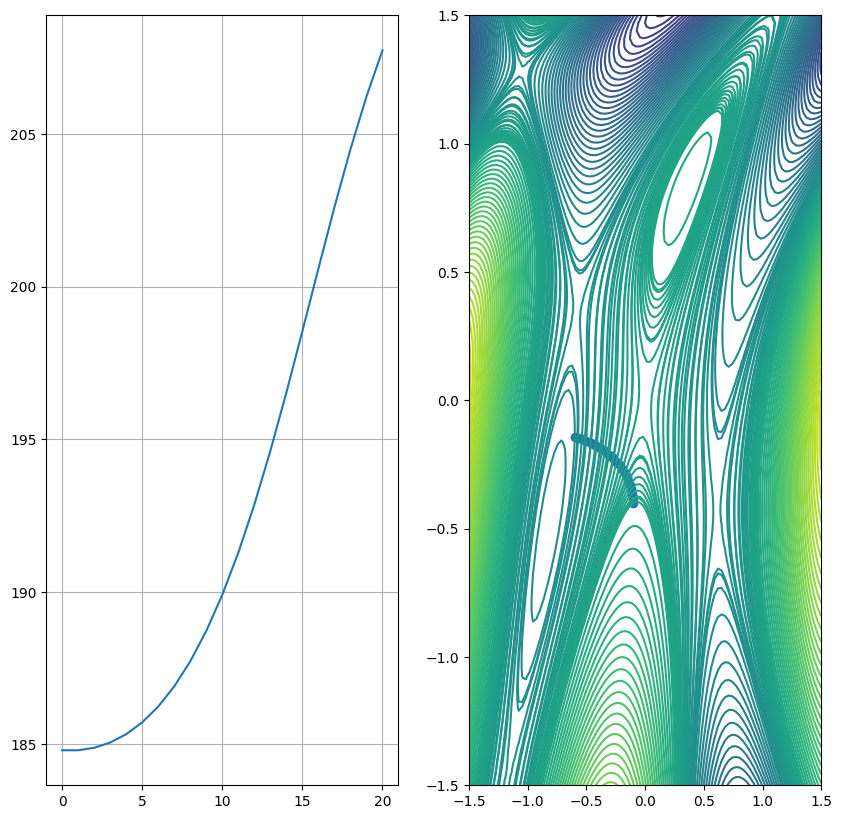

In [53]:
lr = 0.1
epoch = 30
x = np.array([-0.1, -0.4])


points = np.array(gradient_descent(trig_f, trig_grad, x, fixed_step_search(lr), lambda f, points: len(points) > 20))
print(points)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(f(points.T))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, trig_f(np.stack((X, Y))), levels=np.sort(np.concatenate((trig_f(points.T), np.linspace(-1, 1, 100)))))
print(points[-1], trig_f(points[-1]))

# Gradient descent for Rosenbrock function $f(x,y) = 100(y - x^2)^2 + (1 - x)^2$

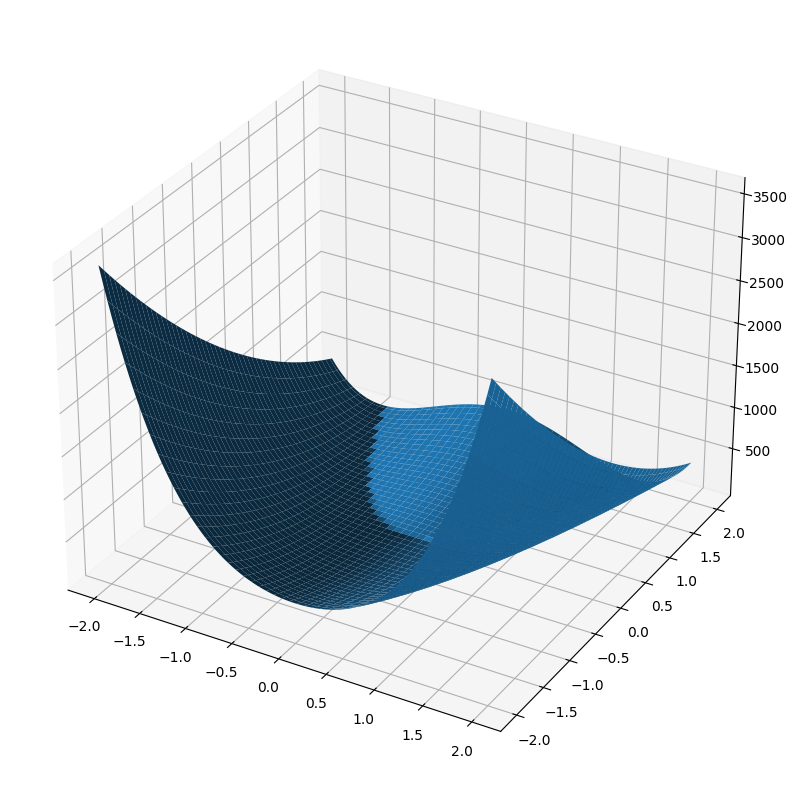

In [38]:
from scipy.optimize import rosen, rosen_der

x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
ax = plt.subplot(111, projection='3d')
ax.plot_surface(X, Y, rosen(np.stack((X, Y))))
plt.show()

[[ 5.00000000e-01 -5.00000000e-01]
 [ 5.30000000e-02 -5.00000000e-02]
 [ 5.53233476e-02 -1.83146000e-02]
 [ 5.95723455e-02 -5.48943633e-03]
 [ 6.45687921e-02 -6.64559187e-05]
 [ 6.98531955e-02  2.47489498e-03]
 [ 7.52325157e-02  3.91763934e-03]
 [ 8.06238282e-02  4.96301459e-03]
 [ 8.59913645e-02  5.88532684e-03]
 [ 9.13196838e-02  6.79083960e-03]
 [ 9.66020815e-02  7.71990663e-03]
 [ 1.01835595e-01  8.68713994e-03]
 [ 1.07018872e-01  9.69714908e-03]
 [ 1.12151263e-01  1.07506830e-02]
 [ 1.17232445e-01  1.18470167e-02]
 [ 1.22262263e-01  1.29848743e-02]
 [ 1.27240661e-01  1.41627862e-02]
 [ 1.32167655e-01  1.53792259e-02]
 [ 1.37043322e-01  1.66326639e-02]
 [ 1.41867785e-01  1.79215887e-02]
 [ 1.46641216e-01  1.92445165e-02]]
[0.14664122 0.01924452] 0.12569450911816396


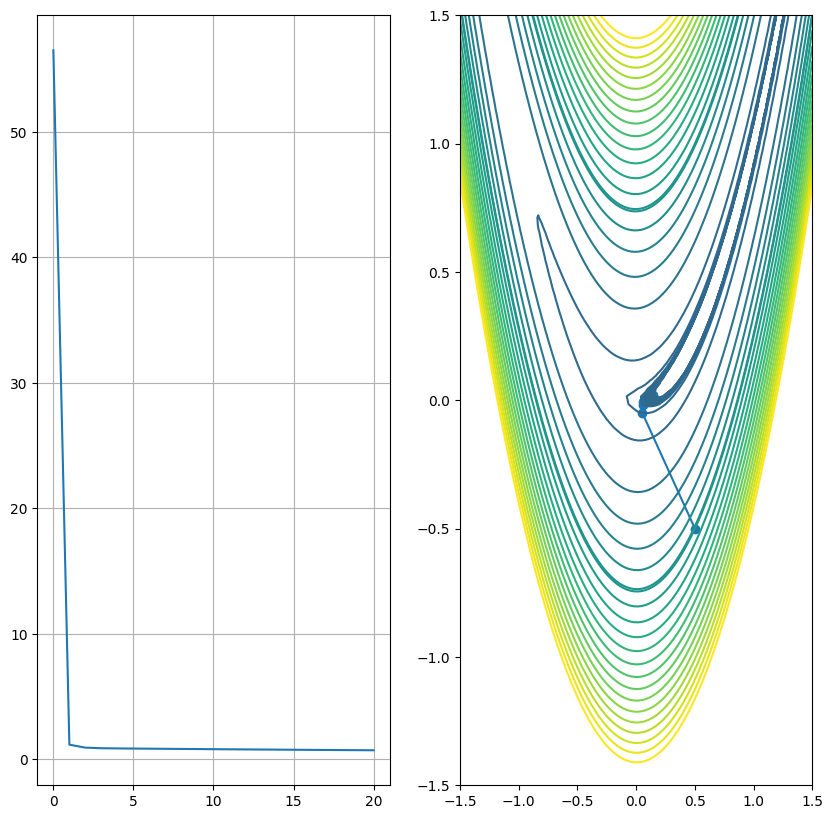

In [51]:
lr = 0.003
epoch = 100
x = np.array([0.5, -0.5])

points = np.array(gradient_descent(rosen, rosen_der, x, fixed_step_search(lr), lambda f, points: len(points) > 20))
print(points)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(rosen(points.T))
ax1.grid()
ax2.plot(points[:, 0], points[:, 1], 'o-')
ax2.contour(X, Y, rosen(np.stack((X, Y))), levels=np.sort(np.concatenate((rosen(points.T), np.linspace(-100, 200, 30)))))
print(points[-1], trig_f(points[-1]))